<a href="https://colab.research.google.com/github/darya-nrgs/notebooks-my_colab_files/blob/main/Exploratory_Data_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">
    <h1>
        تمرین دوم
    </h1>
</div>
<p></p>
<div dir="rtl">
    هدف از این تمرین تثبیت مهارت مجسم سازی داده‌ها و استفاده از ابزار‌های مختلف برای تحلیل اکتشافی آنهاست.
</div>

<div dir="rtl">
توجه داشته باشید که در این تمرین قرار بر کد نویسی‌است و برای پیاده‌سازی یک ایده شاید هزاران راه وجود داشته باشد. اما همانطور که می‌دانید تمام راه‌هایی پیاده‌سازی راه‌های منطقی و درستی نیستند به همین خاطر، دو مساله در اینجا دارای اهمیت بالایی هستند اول تمیز کد زدن و دوم استفاده از ظرفیت‌های موجود در زبان، کتابخانه‌ها و همچنین فریم‌ورک‌هایی‌ست که شما در صورت لزوم با آن‌ها کار می‌کنید.
    <ul>
    <li/>
        تا مجبور نشدید از حلقه و شرط استفاده نکنید.
    <li/>
          از توانایی‌های کتابخانه‌هایی نظیر
        numpy و
        pandas استفاده کنید.
        صد البته از امکانات sklearn و pytorch و ... استفاده نکنید.
    <li/>
        از اول چرخی را اختراع نکنید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری را بیان کنند.یعنی در جاهایی که برای شما مشخص نشده از چه چیزی استفاده کنید با دلیل منطقی و استدلال(لزومی به نوشتن استدلال نیست) انتخاب را انجام دهید نه بصورت تصادفی و اولین نموداری که با آن آشنا هستید.
    </ul>
    رعایت نکردن این قوانین ممکن به از دست رفتن نمره بخش‌هایی از تمرین شما منجر شود حتی در صورتی که پاسخ صحیح توسط کد شما تولید شده باشد.
</div>

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

<div dir="rtl">
    <h2>
        بخش اول: مرور دانش پایه‌ای
    </h2>
    (۱۰ نمره)
</div>

<div dir="rtl">
در بخش اول میخواهیم اهمیت و کاربردی برخی از نمودارها را مرور کنیم. در سلول زیر ۴ نوع نمودار مختلف به همراه قطعه کد آنها فراهم شده است. با استفاده از مثال‌های استفاده شده سعی کنید به سوالات زیر در مورد هر یک از انواع نمودارها پاسخ دهید:
    <br>
    (هر مورد ۲.۵ نمره)
    <br>
    <ul>
        <li>این نمودار برای نمایش چه نوع داده‌ای مناسب‌تر است؟</li>
        <li>به طور کلی مزایای استفاده از این نمودار چیست و چرا باید از این نمودار استفاده کرد؟</li>
    </ul>
</div>

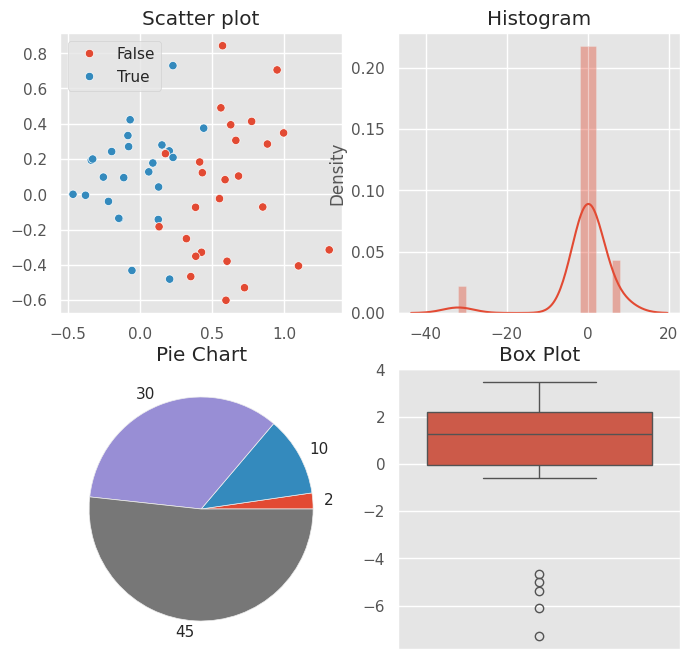

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

r1 = np.random.randn(50)/3
r2 = np.random.randn(50)/3
scatter_hue = np.random.choice([True, False], size=50)
r1 += np.ones(50) * ~scatter_hue * 0.5
axes[0][0].set_title('Scatter plot')
sns.scatterplot(x=r1, y=r2, hue=scatter_hue, ax=axes[0][0])

dist_smaples = list(np.random.normal(loc=0.0, scale=1, size=20)) + [8,8,-32]
axes[0][1].set_title('Histogram')
sns.distplot(dist_smaples, bins=20, hist=True, ax=axes[0][1])

pie_values = [10, 30, 2, 45]
axes[1][0].set_title('Pie Chart')
axes[1][0].pie(sorted(pie_values), labels=sorted(pie_values))

box_values = np.concatenate((2 + np.random.randn(20), -5 + 2 * np.random.randn(5)))
axes[1][1].set_title('Box Plot')
sns.boxplot(box_values, ax=axes[1][1]);

<div dir="rtl">
پاسخ برای scatter plot:
<br>
</div>

<div dir="rtl">
پاسخ برای histogram:
<br>
</div>

<div dir="rtl">
پاسخ برای pie chart:
<br>
</div>

<div dir="rtl">
پاسخ برای box plot:
<br>
</div>

<div dir="rtl">
    <h2>
بخش دوم: لود کردن دیتاست و پاکسازی داده‌ها    </h2>
    (۲۸ نمره)
</div>

<div dir="rtl">
در این بخش هدف ما رسیدن به شناخت سطحی و ابتدایی از دیتاست است. برای اینکار دیتاست را لود کرده و چند سطر ابتدایی آن را نمایش دهید.
<br>
    (۲ نمره)
</div>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')
df.head(10)

Mounted at /content/drive


,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1.0,12.0
1,1,yes,0,33.25000,2.4200,0.005217,9.854167,no,NaN,3,34,1.0,13.0
2,2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1.0,5.0
3,3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1.0,7.0
4,4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1.0,5.0
5,5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1.0,1.0
6,6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1.0,5.0
7,7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1.0,3.0
8,8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1.0,6.0
9,9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1.0,18.0


<div dir="rtl">
    این دیتاست حاوی اطلاعات مرتبط با کارت‌های بانکی مربوط اشخاص مختلف است
<br>
    توضیح هر ستون دیتاست:
    <br>
    <ul>
        <li>reports: تعداد تخلفات فرد در تراکنشات بانکی خود</li>
        <li>age: سن فرد</li>
        <li>income: درامد سالانه فرد که بر ۱۰۰۰۰ تقسیم شده است.</li>
        <li>expenditure: متوسط مخارج ماهانه</li>
        <li>share: نسبت مخارج ماهانه به درامد سالانه</li>
        <li>owner: وضعیت اسکان. صاحب خانه یا مستاجر</li>
        <li>selfimpl: کارمند یا شغل آزاد</li>
        <li>dependents: تعداد افراد وابسته</li>
        <li>Month: تعداد ماه‌هایی که در آدرس کنونی زندگی میکند.</li>
        <li>majorcards: تعداد کارت‌های اصلی فرد</li>
        <li>active: تعداد کارت‌های بانکی فعلا فرد</li>
    </ul>
</div>

<div dir="rtl">
دیتاست را توصیف کنید. نوع داده‌ی هر ستون را مشخص کنید و همینطور مشخص کنید که داده‌ی هر ستون عددی است یا اسمی
    (categorical).
    <br>
    ستون‌های اضافی که استفاده نمی‌شوند (یعنی ستون
    card و ستون Unnamed)
    را پاک کنید و
به ازای هر ستون عددی اطلاعات آماری آن را از جمله کمینه، بیشینه، میانگین، واریانس و میانه را بدست آورید و به ازای ستون های‌ اسمی، تعداد مقادیر یکتا و همینطور تعداد تکرار هر مقدار یکتا را بدست آورید.
    ( مثلا ستون x از دو مقدار یکتای yes و no .تشکیل شده است که به ترتیب ۳۰۰ و ۴۰۰ بار تکرار شده اند)
    <br>
    چه درصدی از فیلد‌های هر ستون ناموجود هستند؟
    <br>
    (۹ نمره)
</div>

In [ ]:
df.drop(["card","Unnamed: 0"], axis=1 , inplace=True)

In [ ]:
# Data types (numerical or non-numerical)
df.dtypes

,0
reports,int64
age,float64
income,float64
share,float64
expenditure,float64
owner,object
selfemp,object
dependents,int64
months,int64
majorcards,float64


In [ ]:
# For each column specify the state of being numeric or categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      1319 non-null   int64  
 1   age          1296 non-null   float64
 2   income       1319 non-null   float64
 3   share        1319 non-null   float64
 4   expenditure  1319 non-null   float64
 5   owner        1318 non-null   object 
 6   selfemp      1308 non-null   object 
 7   dependents   1319 non-null   int64  
 8   months       1319 non-null   int64  
 9   majorcards   1272 non-null   float64
 10  active       1315 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 113.5+ KB


In [ ]:
# Show statistical info for numeric and categorical columns
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1296.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1272.000000,1315.000000
mean,0.456406,33.263632,3.365376,0.066309,181.046615,0.993935,55.267627,0.818396,6.752852
std,1.345267,10.171424,1.693902,0.107471,280.937245,1.247745,66.271746,0.385669,6.377321
min,0.000000,0.166667,0.210000,-1.000000,-953.565255,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,25.416670,2.243750,0.002072,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.291665,2.900000,0.038755,101.200800,1.000000,30.000000,1.000000,5.000000
75%,0.000000,39.416670,4.000000,0.093548,248.812500,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [ ]:
df["selfemp"].value_counts()

,count
selfemp,
no,1210
yes,87
no-info,11


In [ ]:
df['owner'].value_counts()

,count
owner,
no,723
yes,574
0,14
1,7


In [ ]:
#loc[:,'owner'] :  در همه ردیف ها در ستون مالک
df['owner'] = df.loc[:, 'owner'].replace({"no": False , "yes": True , "0":False , "1": True})
df['owner'].value_counts()

,count
owner,
False,737
True,581


In [ ]:
df['selfemp']=df.loc[: , 'selfemp'].replace({"no": False , "yes": True , "no-info":np.nan})
df['selfemp'].value_counts()

,count
selfemp,
False,1210
True,87


In [ ]:
# Calc missing fields count for each col
(df.shape[0] - df.describe().loc["count"]) / df.shape[0] *100
#df.shape[0] تعداد کل ردیف‌ها را برمی‌گرداند.
# loc["count"] : فقط تعداد مقادیر غیرگمشده

,count
reports,0.000000
age,1.743745
income,0.000000
share,0.000000
expenditure,0.000000
dependents,0.000000
months,0.000000
majorcards,3.563306
active,0.303260


<div dir=rtl>
وجود داده‌ی outlier را نیز در ستون‌های عددی  به کمک boxplot بررسی کنید
    و برای outlier بودن یا نبودن داده‌ها در نهایت تصمیم بگیرید.
    (نیاز به تغییری در دیتاست نیست. صرفا تصمیم بگیرید چه معیاری را برای outlier بودن یا نبودن داده‌ها در هر ستون میخواهید در نظر بگیرید.)
    <br>
    (۳ نمره)
</div>

<Axes: xlabel='active'>

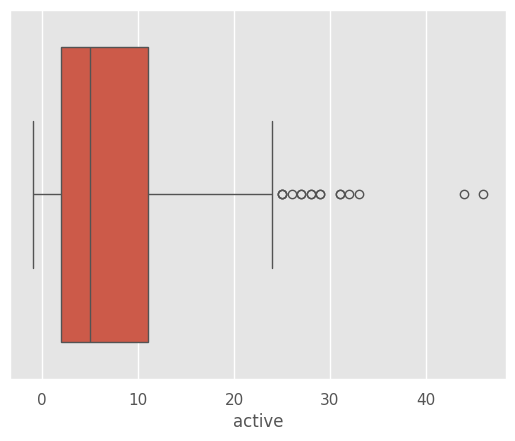

In [ ]:
sns.boxplot(df['active'], orient='h')

In [ ]:
print(df['age'].isnull().sum())

0


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert non-numeric to NaN
df = df.dropna(subset=['age'])  # Drop rows with NaN in 'age'

In [ ]:
print(df['age'].isnull().sum())

0


<Axes: xlabel='age'>

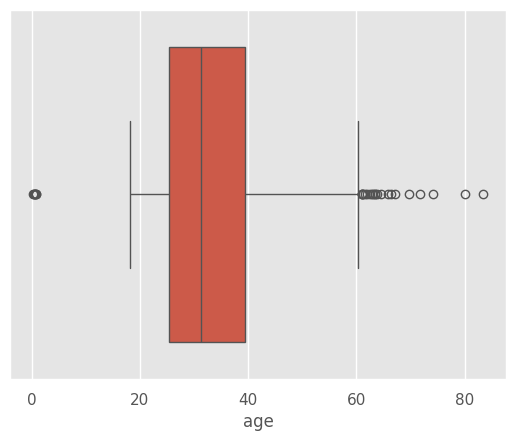

In [ ]:
sns.boxplot(df['age'], orient='h')

In [ ]:
filtered_df = df[df['age'] > 0]
print(filtered_df)


      reports       age  income     share  expenditure  owner selfemp  \
0           0  37.66667  4.5200  0.033270   124.983300   True      no   
1           0  33.25000  2.4200  0.005217     9.854167  False     NaN   
2           0  33.66667  4.5000  0.004156    15.000000   True      no   
3           0  30.50000  2.5400  0.065214   137.869200  False      no   
4           0  32.16667  9.7867  0.067051   546.503300   True      no   
...       ...       ...     ...       ...          ...    ...     ...   
1314        0  33.58333  4.5660  0.002146     7.333333   True      no   
1315        5  23.91667  3.1920  0.000376     0.000000  False      no   
1316        0  40.58333  4.6000  0.026513   101.298300   True      no   
1317        0  32.83333  3.7000  0.008999    26.996670  False     yes   
1318        0  48.25000  3.7000  0.111619   344.157500   True      no   

      dependents  months  majorcards  active  
0              3      54         1.0    12.0  
1              3      34     

<div dir="rtl">
در برخی از ستون‌های اسمی عباراتی وجود دارند که معادل ناموجود بودن مقدار آن ردیف در ان ستون هستند. همچنین ستون‌های اسمی باینری نیز بهتر است به حالت True, False در بیایند.
        برای ستون‌های عددی نیز برخی مقادیر غیر مجاز یا ناموجود هستند(یعنی برای ستون‌هایی که باید مقدار مثبت داشته باشند، مقدار منفی ثبت شده است و یا داده‌ای بسیار بزرگ به عبارتی outlier وجود دارد) که باید به صورت None در بیایند.
    این ستون‌ها را تغییر دهید و دوباره نسبت مقادیر ناموجود هر ستون و همینطور اطلاعات آماری ستون های عددی تغییر یافته را محاسبه کنید.
    <br>
    (۵ نمره)
</div>

In [ ]:
# Calc missing fields
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      1296 non-null   int64  
 1   age          1296 non-null   float64
 2   income       1296 non-null   float64
 3   share        1296 non-null   float64
 4   expenditure  1296 non-null   float64
 5   owner        1296 non-null   object 
 6   selfemp      1285 non-null   object 
 7   dependents   1296 non-null   int64  
 8   months       1296 non-null   int64  
 9   majorcards   1250 non-null   float64
 10  active       1292 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 121.5+ KB


<Axes: >

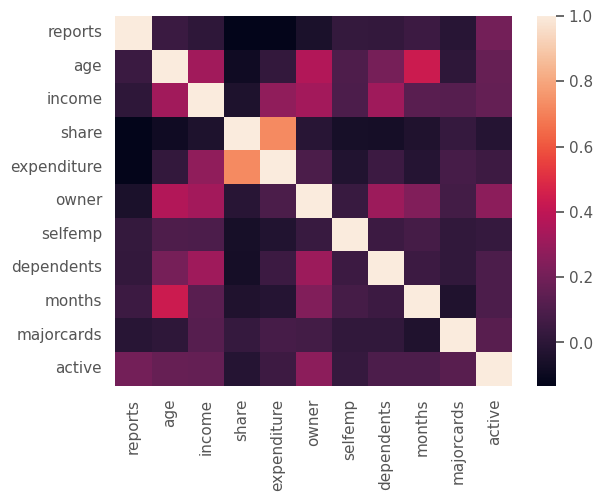

In [ ]:
sns.heatmap(df.corr())

<div dir="rtl">
    گاهی ستون‌های مختلف دیتاست از منابع جداگانه‌ای استخراج می‌شوند که در هر یک می‌توانند باعث ناموجود شدن فیلدهای برخی ستون‌ها بشوند.
     به همین دلیل تشخیص ارتباط ستون‌ها در ناموجود بودن
    فیلد‌هایشان می‌تواند به تشخیص و حذف دسته‌های معیوب داده‌ها کمک کند.
    <br>
با استفاده از نمودار heatmap  ارتباط ستون‌ها را در نداشتن مقدار نشان دهید.
    یعنی محتوای هر ستون را به صورت True
    (<b>
    ناموجود</b>)
    و False
    (<b>موجود</b>)
    در بیاورید و همبستگی ستون‌های حاصل را با heatmap نشان داده و مقایسه کنید.
    <br>
    برای کدام دو ستون به احتمال بیشتری علت نداشتن مقدار یکسان است؟
    <br>
    (۴ نمره)
</div>

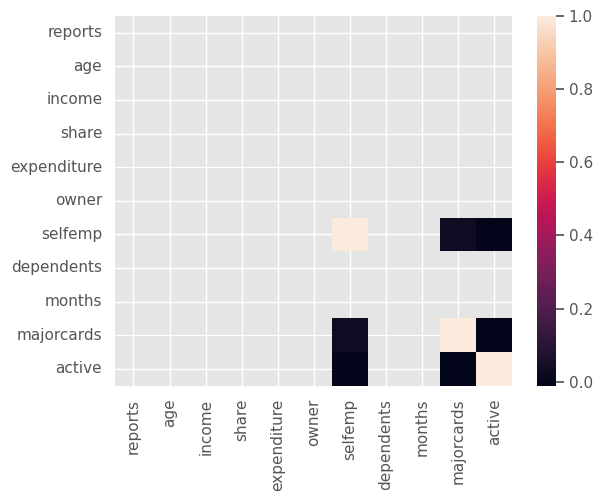

In [ ]:
#افرادی که داده ای برای مالک بودنشان وجود ندارد به احتمال زیاد برای سن شان هم وجود ندارد
sns.heatmap(df.isna().corr());

<div dir=rtl>
    دو روش برای حل مشکل مقادیر ناموجود در یک دیتاست، پر کردن آن‌ها با میانگین و میانه‌ی مقادیر هر ستون است.
    این دو روش را با هم مقایسه کرده و شرح دهید هر یک در چه شرایطی بهتر عمل می‌کنند.
    <br>
    برای ستون‌هایی که دارای داده‌های تهی هستند تصمیمی اتخاذ کنید.
    <br>
    (۵ نمره)
</div>

In [ ]:
#انتخاب بین استفاده از میانه (Median) یا میانگین (Mean) برای پر کردن مقادیر گمشده (NaN) در داده‌ها در یادگیری ماشین به ویژگی‌های داده و شرایط خاص مسئله بستگی دارد. در ادامه، شرایط مناسب برای هر روش توضیح داده می‌شود:
#اگر داده‌ها نرمال و بدون مقادیر پرت هستند، از میانگین استفاده کنید.Mean
#گر داده‌ها چوله یا دارای مقادیر پرت هستند، از میانه استفاده کنید.Median
#داده‌هایی که به دسته‌های مشخص تقسیم شده‌اندMedian
#قبل از تصمیم‌گیری، توزیع داده‌ها را با استفاده از هیستوگرام یا چگالی احتمال (Density Plot) بررسی کنید.
#آزمایش و ارزیابی:
#گاهی اوقات بهترین راه، آزمایش هر دو روش (میانه و میانگین) و بررسی تاثیر آن‌ها بر دقت مدل است.

<div dir=rtl>
    پاسخ شما:
</div>

<div dir="rtl">
    <h2>
بخش سوم: تحلیل اکتشافی داده‌ها    </h2>
    (۳۲ نمره)
</div>

<div dir=rtl>
هدف ما در نهایت از تحلیل این دیتاست پیشبینی درامد فرد است. برای اینکار در ابتدا توزیع احتمال درآمد فرد را نمایش دهید.
    <br>
    (۲ نمره)
</div>

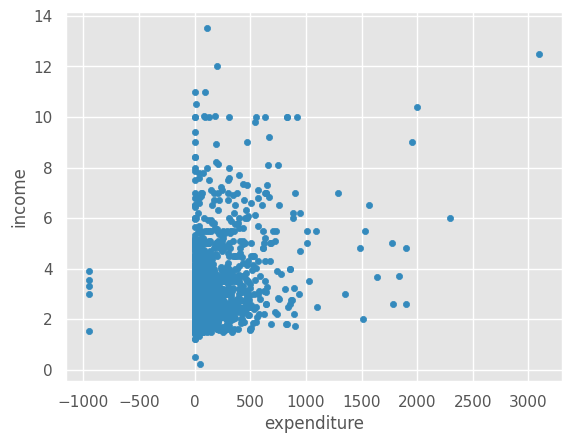

In [ ]:
df.plot(kind = 'scatter', x = 'expenditure', y = 'income')
plt.show()

<div dir=rtl>
توزیع احتمال درامد را به ازای وضعیت اقامت (صاحب خانه یا مستاجر) نمایش دهید.
    <br>
    (۳ نمره)
</div>

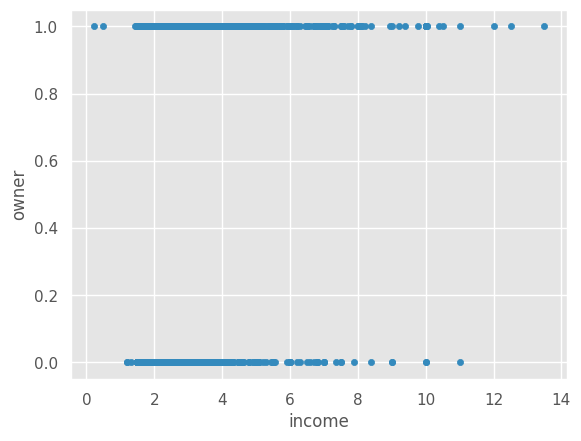

In [ ]:
df.plot(kind = 'scatter', x = 'income' , y= 'owner')
plt.show()

<div dir=rtl>
    توزیع سنی افراد را نشان دهید. سپس
افراد را به سه گروه جوان میان سال و کهنسال تقسیم کرده و بر اساس آن‌ها توزیع احتمال درامد را نمایش دهید.
   سه بازه‌ی ۰ تا ۳۵ سال،  ۳۵تا ۵۵ سال و ۵۵ سال به بالا را به عنوان بازه‌های سنی جوان، میانسال و کهنسال در نظر بگیرید و به ازای هر فرد مقدار سنش را به یکی از این سه دسته در قالب ستونی جدید مپ کنید.
    (مقادیر ستون جدید برای راحتی در تحلیل بهتر است به صورت ۰ ۱ ۲ باشد.)
    <br>
    (۵ نمره)
</div>

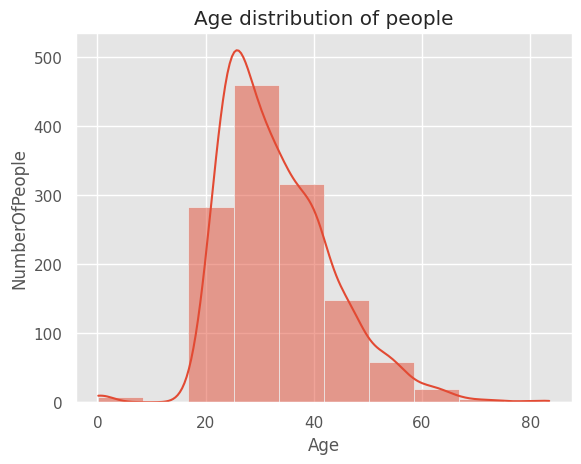

age_group
0    815
1    438
2     66
Name: count, dtype: int64


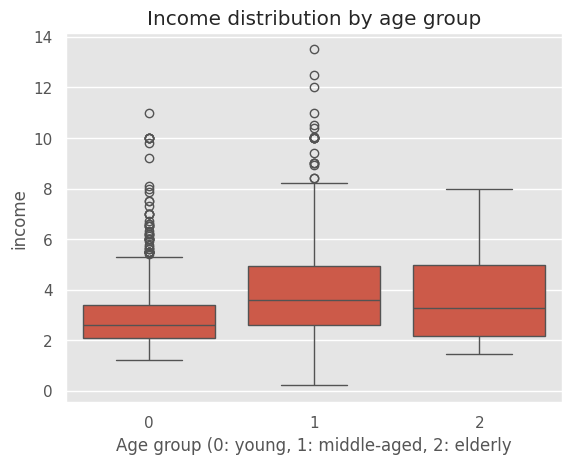

In [ ]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age distribution of people")
plt.xlabel("Age")
plt.ylabel("NumberOfPeople")
plt.show()

# 2. ایجاد ستون جدید برای دسته‌بندی سنی
def categorize_age(age):
    if age <= 35:
        return 0  # جوان
    elif 35 < age <= 55:
        return 1  # میانسال
    else:
        return 2  # کهنسال

# اعمال تابع برای دسته‌بندی سنی
df['age_group'] = df['age'].apply(categorize_age)

# بررسی توزیع ستون age_group
print(df['age_group'].value_counts())

# 3. نمایش توزیع درآمد بر اساس گروه‌های سنی
sns.boxplot(x='age_group', y='income', data=df)
plt.title("Income distribution by age group")
plt.xlabel("Age group (0: young, 1: middle-aged, 2: elderly")
plt.ylabel("income")
plt.show()


<div dir=rtl>
رابطه‌ی درامد و تعداد تخلف را با نمودار مناسب نمایش دهید.
    <br>
    (۳ نمره)
</div>

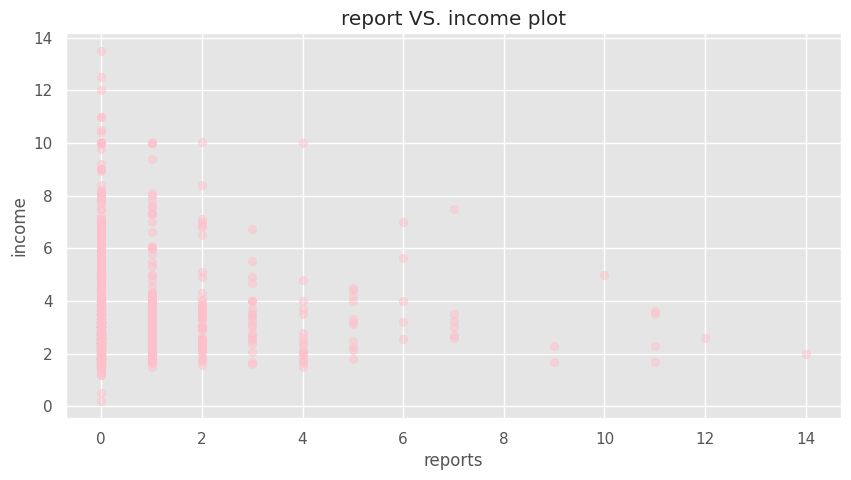

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['reports'], df['income'], color='pink', alpha=0.5)
plt.xlabel("reports")
plt.ylabel("income")
plt.title("report VS. income plot")
plt.show()


<div dir=rtl>
نمودار heatmap را برای تمام ستون‌ها رسم کنید. کدام ستون‌ها بیشترین و کمترین همبستگی را با درامد دارند؟
    <br>
    (۳ نمره)
</div>

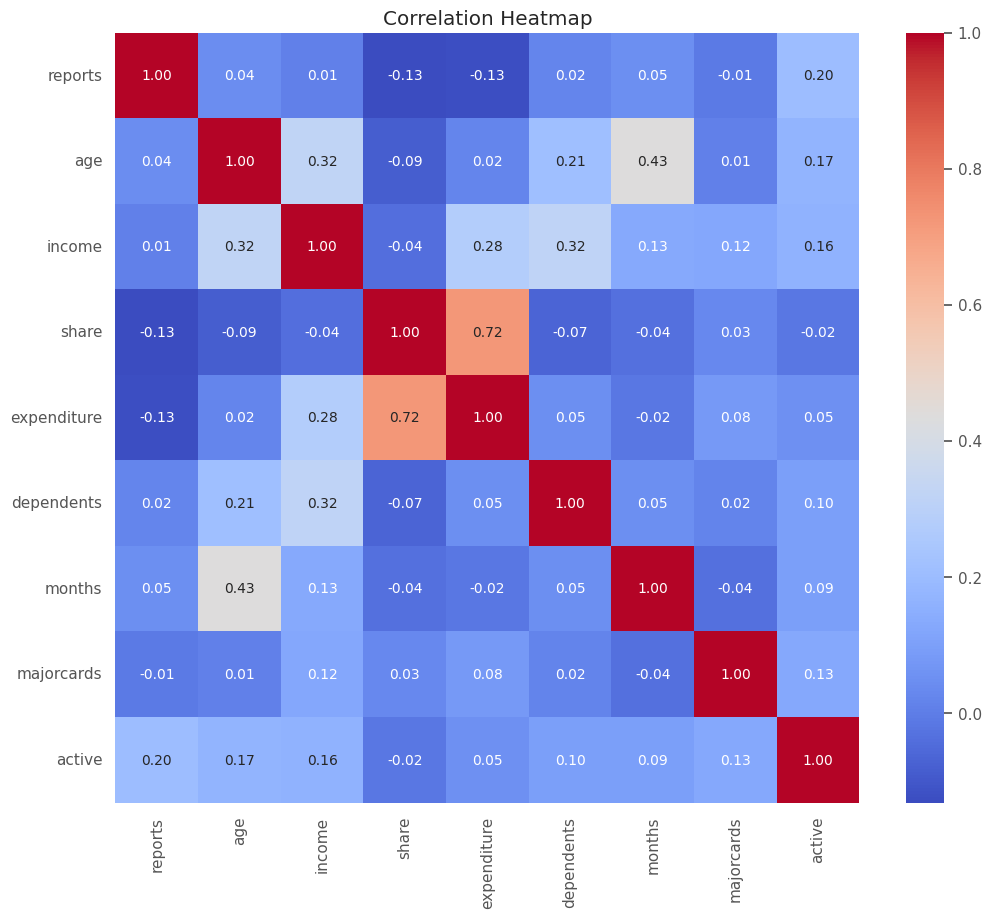

همبستگی با درآمد:
income         1.000000
age            0.322242
dependents     0.318873
expenditure    0.275548
active         0.161941
months         0.131140
majorcards     0.121857
share          0.041182
reports        0.005927
Name: income, dtype: float64

بیشترین همبستگی با درآمد: age
کمترین همبستگی با درآمد: reports


In [ ]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# بیشترین و کمترین همبستگی با درآمد
correlation_with_income = numeric_df.corr()['income'].abs().sort_values(ascending=False)
print("همبستگی با درآمد:")
print(correlation_with_income)
print("\nبیشترین همبستگی با درآمد:", correlation_with_income.index[1])
print("کمترین همبستگی با درآمد:", correlation_with_income.index[-1])


<div dir=rtl>
با استفاده از میانگین درامد افراد را در ستونی با نام wealth به دو گروه فقیر و ثروتمند تقسیم کنید
    (بالای میانگین گروه ثروتمند و پایین یا مساوی میانگین گروه فقیر)
    و
    درصد افراد ثروتمند و فقیر را در یک نمودار با نمایش درصد هر گروه نشان دهید.
    <br>
    (۵ نمره)
</div>

In [ ]:
df["wealth"] = df["income"] >= df["income"].mean()
df

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,wealth
0,0,37.66667,4.5200,0.033270,124.983300,True,no,3,54,1.0,12.0,True
1,0,33.25000,2.4200,0.005217,9.854167,False,NaN,3,34,1.0,13.0,False
2,0,33.66667,4.5000,0.004156,15.000000,True,no,4,58,1.0,5.0,True
3,0,30.50000,2.5400,0.065214,137.869200,False,no,0,25,1.0,7.0,False
4,0,32.16667,9.7867,0.067051,546.503300,True,no,2,64,1.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,True,no,0,94,1.0,19.0,True
1315,5,23.91667,3.1920,0.000376,0.000000,False,no,3,12,1.0,5.0,False
1316,0,40.58333,4.6000,0.026513,101.298300,True,no,2,1,1.0,2.0,True
1317,0,32.83333,3.7000,0.008999,26.996670,False,yes,0,60,1.0,7.0,True


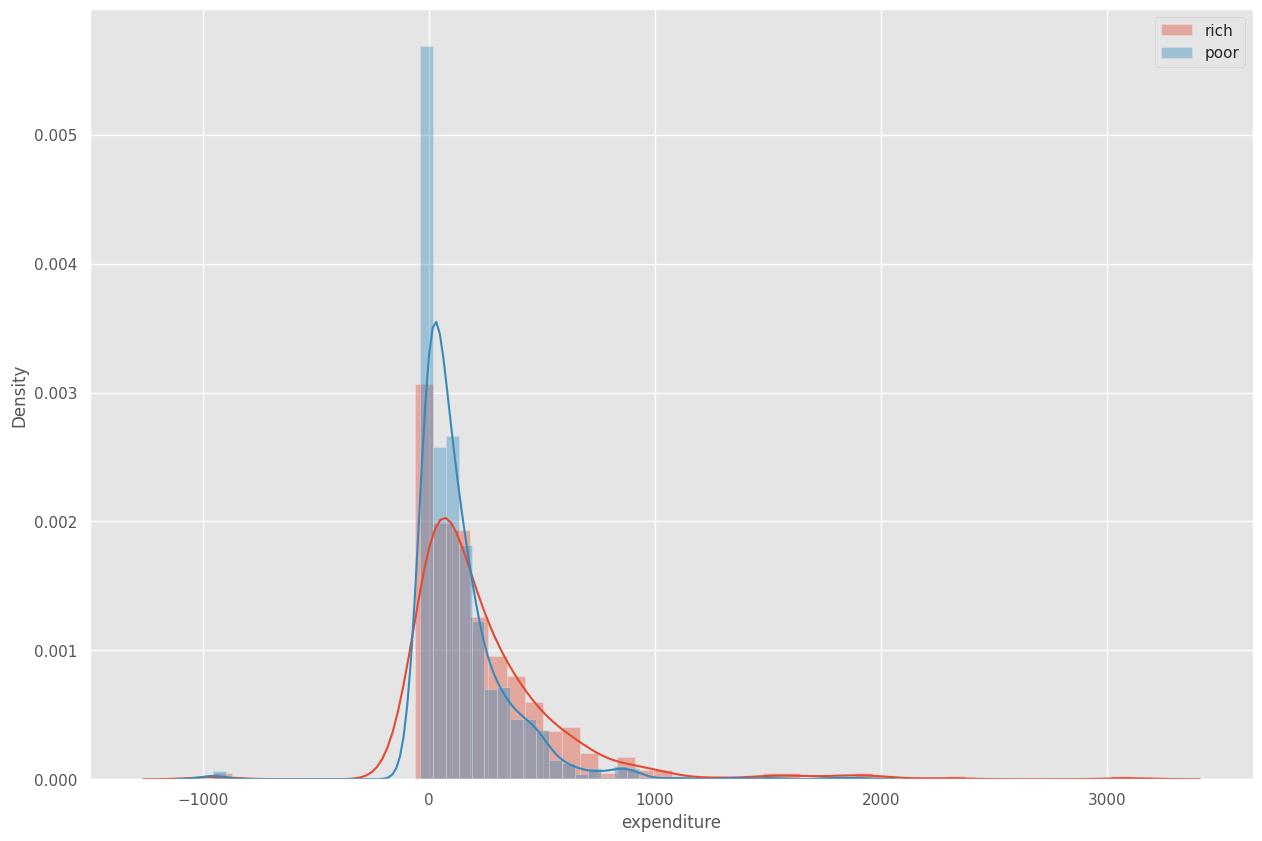

In [ ]:
rich=df["expenditure"][df["wealth"]]
poor=df["expenditure"][-df["wealth"]]
plt.figure(figsize=(15,10))
sns.distplot(rich , label= "rich")
sns.distplot(poor , label= "poor")
plt.legend();

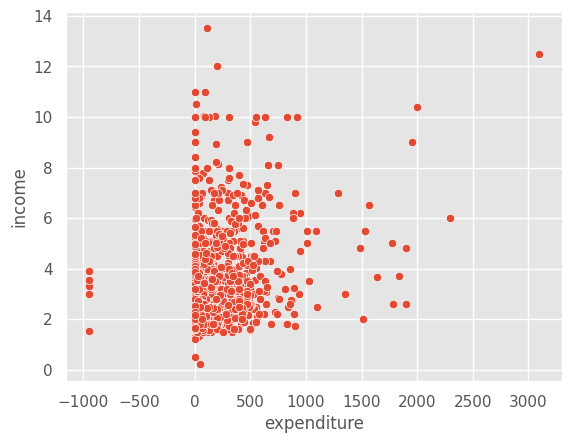

In [ ]:
sns.scatterplot(data=df , x="expenditure" , y="income");

rich=df["expenditure"][df["wealth"]]
poor=df["expenditure"][-df["wealth"]]
plt.figure(figsize=(15,10))
sns.distplot(rich , label= "rich")
sns.distplot(poor , label= "poor")
plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


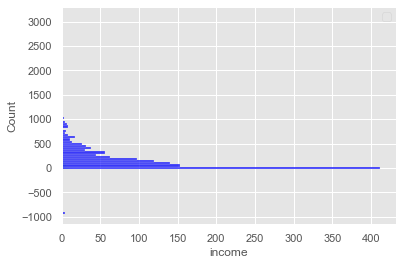

In [ ]:
z

<div dir=rtl>
آیا با دسته بندی ستون expenditure با استفاده از percentileهای ۱۰ تایی رابطه‌ی معنادار تری بین آن ستون و ستون ثروت برقرار می‌شود؟
    <br>
    (۵ نمره)
</div>

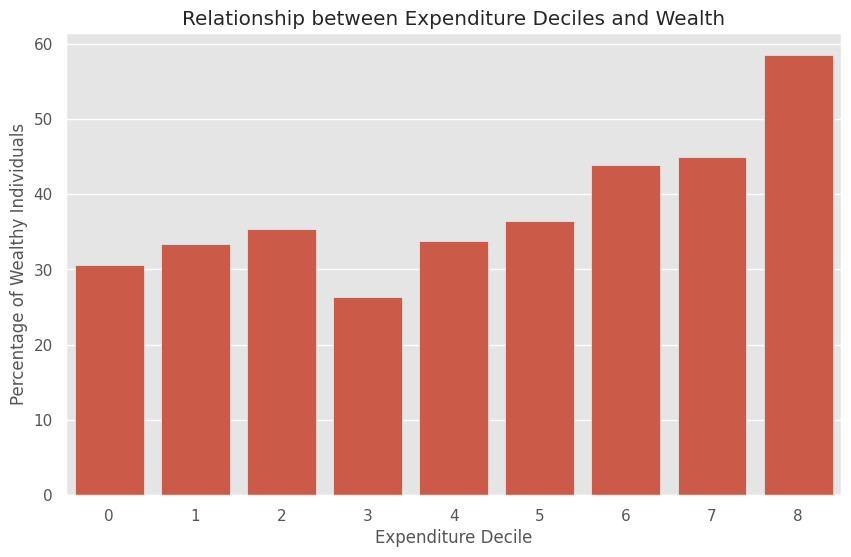

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'wealth' column exists as defined in the previous code.

# Calculate deciles for the 'expenditure' column, dropping duplicates
df['expenditure_decile'] = pd.qcut(df['expenditure'], 10, labels=False, duplicates='drop')

# Group data by decile and wealth status and count occurrences
grouped = df.groupby(['expenditure_decile', 'wealth']).size().unstack(fill_value=0)

# Calculate the percentage of wealthy individuals in each decile
grouped['wealth_percentage'] = (grouped[True] / (grouped[True] + grouped[False])) * 100

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='expenditure_decile', y='wealth_percentage', data=grouped.reset_index())
plt.xlabel('Expenditure Decile')
plt.ylabel('Percentage of Wealthy Individuals')
plt.title('Relationship between Expenditure Deciles and Wealth')
plt.show()

# Further analysis (optional):
# You can perform statistical tests (e.g., chi-squared test) to determine if
# the relationship between expenditure deciles and wealth is statistically significant.

<div dir=rtl>
تمام داده‌های اسمی را به داده‌های عددی تبدیل کنید.
<br>
    (۳ نمره)
</div>

In [ ]:
# Method 1: Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
categorical_cols = ['owner', 'selfemp']

# Iterate through the columns and apply label encoding
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))


# Method 2: One-Hot Encoding (if needed)
# This is typically used when the categorical variable does not have a natural order

# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder object
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for direct array output

# # Fit and transform the categorical columns
# encoded_features = ohe.fit_transform(df[['owner','selfemp']])

# # Create new DataFrame with one-hot encoded features
# encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['owner','selfemp']))
# df = pd.concat([df, encoded_df], axis=1)
# df = df.drop(['owner','selfemp'],axis=1)

print(df.head())


   reports       age  income     share  expenditure  owner  selfemp  \
0        0  37.66667  4.5200  0.033270   124.983300      1        1   
1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2        0  33.66667  4.5000  0.004156    15.000000      1        1   
3        0  30.50000  2.5400  0.065214   137.869200      0        1   
4        0  32.16667  9.7867  0.067051   546.503300      1        1   

   dependents  months  majorcards  active  wealth  expenditure_decile  
0           3      54         1.0    12.0    True                   4  
1           3      34         1.0    13.0   False                   1  
2           4      58         1.0     5.0    True                   1  
3           0      25         1.0     7.0   False                   4  
4           2      64         1.0     5.0    True                   8  


<div dir="rtl">
    <h2>
بخش چهارم: کاهش ابعاد    </h2>
    (۳۰ نمره)
</div>

<div dir=rtl>
    هدف ما در این بخش آشنایی با دو روش pca و tsne در کاهش ابعاد است.
    برای اینکار ابتدا به کمک کتابخانه‌ی sklearn این دو روش را بر روی دیتاست mnist آزمایش  و مقایسه کرده،
    سپس به پیاده سازی مرحله به مرحله pca بر روی دیتاست اصلی میپردازیم.
</div>

<div dir=rtl>
    در ابتدا دیتا ست mnist را از فایل لود کرده و یک یا چند داده از آن را نمایش دهید.
    <br>
    (۱ نمره)
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from PIL import Image
file_path = '/content/drive/MyDrive/Colab Notebooks/mnist.zip'  # Adjust path if needed
with np.load(file_path) as data:
    arr, label = data['X'], data['y']
    # You can now work with 'arr' and 'label'
    print(f"Data shape: {arr.shape}")
    print(f"Labels shape: {label.shape}")

# Optional: Displaying a sample image
sample_image = arr[0].reshape(28, 28)
img = Image.fromarray(sample_image.astype('uint8'), 'L')
img.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (10000, 28, 28)
Labels shape: (10000,)


<div dir=rtl>
با دو روش pca و tsne و با استفاده از ۲ تا از مقادیر ویژه ابعاد دیتاست را کاهش دهید.
    برای روش pca مقادیر و بردارهای ویژه‌ی استفاده شده و درصد واریانس حفظ شده را مشخص کنید.
    <br>
    (۵ نمره)
</div>

---

### **کاهش ابعاد با PCA**

**PCA** (تحلیل مؤلفه‌های اصلی) یک روش **خطی** برای کاهش ابعاد است که با پیدا کردن جهت‌های (مؤلفه‌های اصلی) دارای **بیشترین واریانس** در داده‌ها کار می‌کند. برای کاهش ابعاد به 2، ما از دو مؤلفه اصلی اول استفاده می‌کنیم.

#### **مراحل:**

1.  **آماده‌سازی داده‌ها**:
    * ابتدا دیتاست را نرمال‌سازی (standardize) می‌کنیم تا میانگین آن صفر و واریانس آن یک شود. این کار از تأثیر مقیاس‌های مختلف ویژگی‌ها جلوگیری می‌کند.
2.  **اجرای PCA**:
    * مدل PCA را با `n_components=2` ایجاد کرده و روی داده‌ها اعمال می‌کنیم.
    * این مدل **دو بردار ویژه (Eigenvectors)** را پیدا می‌کند که نشان‌دهنده دو مؤلفه اصلی هستند.
3.  **مشخصات PCA**:
    * **بردارهای ویژه (Eigenvectors)**: این بردارها، محورهای جدیدی هستند که دیتاست در آن‌ها پیش‌بینی می‌شود. در اینجا، دو بردار ویژه خواهیم داشت که هر کدام 784 عنصر دارند.
    * **مقادیر ویژه (Eigenvalues)**: این مقادیر، واریانس مرتبط با هر بردار ویژه را نشان می‌دهند. ما از دو مقدار ویژه اول که بزرگ‌ترین واریانس را دارند، استفاده می‌کنیم.
    * **واریانس حفظ شده (Explained Variance)**: این مقدار نشان می‌دهد که چند درصد از واریانس کل داده‌ها توسط این دو مؤلفه اصلی اول توضیح داده می‌شود. این مقدار معمولاً برای 2 بعد در دیتاست‌های پیچیده مانند MNIST کم است، اما برای تجسم داده‌ها کافی است.

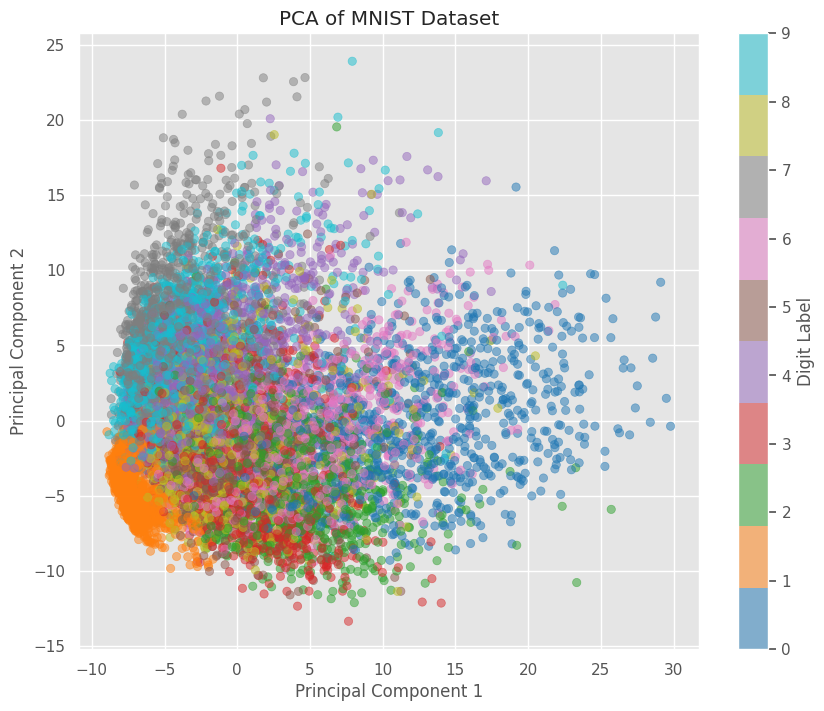

PCA Eigenvectors (Principal Components):
 [[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
--------------------------------------------------
PCA Eigenvalues (Explained Variance):
 [41.39893398 28.35105808]
--------------------------------------------------
Total variance preserved by 2 components: 10.44%


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Flatten the images from 28x28 to 784 dimensions
X_flat = arr.reshape(arr.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat.astype(float))

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap='tab10', alpha=0.5)
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.show()

# Print PCA properties
print("PCA Eigenvectors (Principal Components):\n", pca.components_)
print("-" * 50)
print("PCA Eigenvalues (Explained Variance):\n", pca.explained_variance_)
print("-" * 50)
print("Total variance preserved by 2 components: {:.2f}%".format(
    pca.explained_variance_ratio_.sum() * 100))


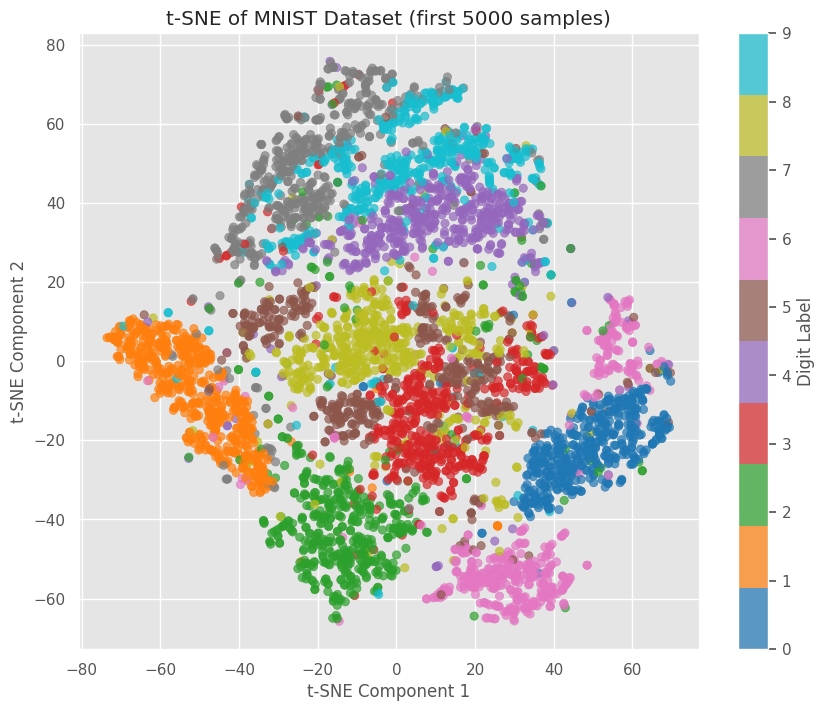

In [ ]:
from sklearn.manifold import TSNE

# For t-SNE, it's often a good practice to use a subset of the data
# due to its high computational cost. Here, we'll use a subset of 5000 points.
n_samples = 5000
X_subset = X_scaled[:n_samples]
label_subset = label[:n_samples]

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=label_subset, cmap='tab10', alpha=0.7)
plt.title('t-SNE of MNIST Dataset (first 5000 samples)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.show()

<div dir=rtl>
دیتاست‌های حاصل را در قالب نمودار دوبعدی نمایش داده و قابلیت این دو روش را در جداسازی کلاس‌های مختلف و با استفاده از لیبل داده‌ها مقایسه کنید. علت برتری یک روش به روش دیگر را به طور خلاصه توضیح دهید.
    <br>
    (۴ نمره)
</div>

### **علت برتری t-SNE**

با توجه به نمودارها و تحلیل‌ها، **t-SNE به وضوح در جداسازی بصری کلاس‌ها نسبت به PCA برتری دارد.** دلایل اصلی این برتری عبارتند از:

* **پردازش غیرخطی**:
    * **PCA** یک روش **خطی** است و تنها قادر به یافتن جهاتی است که واریانس را به حداکثر می‌رساند. این روش برای داده‌هایی که ساختار غیرخطی پیچیده دارند (مانند تصاویر ارقام MNIST)، چندان مؤثر نیست.
    * **t-SNE** یک روش **غیرخطی** است که می‌تواند روابط پیچیده‌تر بین داده‌ها را درک کند و آن‌ها را در فضای کاهش‌یافته نمایش دهد.

* **حفظ ساختار محلی**:
    * **t-SNE** بر **حفظ فواصل محلی** بین نقاط داده تمرکز دارد. به این معنی که نقاطی که در فضای اصلی (784 بعدی) به یکدیگر نزدیک هستند، در فضای کاهش‌یافته (2 بعدی) نیز نزدیک باقی می‌مانند. این ویژگی باعث می‌شود که خوشه‌های همگن (ارقام یکسان) به خوبی از یکدیگر جدا شوند.

* **بهینه‌سازی برای تجسم**:
    * **t-SNE** به‌طور خاص برای **تجسم داده‌ها** و نمایش ساختارهای خوشه‌ای طراحی شده است.
    * **PCA** بیشتر برای **کاهش ابعاد کلی** با هدف حذف نویز و بهبود عملکرد مدل‌های یادگیری ماشین استفاده می‌شود.
    * به همین دلیل، برای هدف تجسم و جداسازی بصری کلاس‌ها، t-SNE گزینه مناسب‌تری است.

<div dir=rtl>
حال میخواهیم pca را بر روی دیتاست اصلی خود بدون استفاده از کتابخانه‌ی sklearn پیاده سازی کنیم. برای اینکار در ابتدا ستون‌های فیچر را جداکرده و سپس داده‌ها را نرمالایز کنید. لزوم نرمالایز کردن داده‌ها برای روش pca به چه خصوصیتی از این روش باز میگردد؟
    <br>
    (۴ نمره)
</div>

In [ ]:
import numpy as np

# Assuming 'arr' is your original flattened dataset from the previous step
X = arr.reshape(arr.shape[0], -1).astype(float)

# 1. Normalization (Standardization)
# Calculate the mean of each feature (column)
mean = np.mean(X, axis=0)

# Calculate the standard deviation of each feature (column)
std_dev = np.std(X, axis=0)

# Identify columns with zero standard deviation
zero_std_dev_indices = np.where(std_dev == 0)[0]

# Replace zero standard deviation with a very small number to prevent division by zero
# A common practice is to replace it with 1, as it won't affect the zero-variance column
# but avoids the error.
std_dev[zero_std_dev_indices] = 1

# Normalize the data
X_normalized = (X - mean) / std_dev

# 2. Covariance Matrix Calculation
# The covariance matrix is (X_normalized^T * X_normalized) / (n-1)
cov_matrix = np.cov(X_normalized.T)

# 3. Eigenvectors and Eigenvalues Calculation
try:
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # The rest of your code for sorting and projecting
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    n_components = 2
    principal_components = sorted_eigenvectors[:, :n_components]
    X_pca_manual = np.dot(X_normalized, principal_components)

    print("Shape of the original data:", X.shape)
    print("Shape of the manually calculated PCA data:", X_pca_manual.shape)

except np.linalg.LinAlgError as e:
    print(f"An error occurred: {e}")
    print("This may be due to a singular matrix after normalization.")

Shape of the original data: (10000, 784)
Shape of the manually calculated PCA data: (10000, 2)


<div dir=rtl>
حال ماتریس کوواریانس دیتاست موجود را بدست آورید و مقادیر و بردار‌های ویژه‌ی آن را به ترتیب نزولی مقادیر ویژه نمایش دهید.
    <br>
    (۳ نمره)
</div>

In [ ]:
import numpy as np

# فرض می‌کنیم X_normalized همان دیتاست نرمال‌شده‌ای است که در پاسخ قبلی ایجاد شد.
# اگر این متغیر در دسترس نیست، مراحل زیر را اجرا کنید:
# X = arr.reshape(arr.shape[0], -1).astype(float)
# mean = np.mean(X, axis=0)
# std_dev = np.std(X, axis=0)
# zero_std_dev_indices = np.where(std_dev == 0)[0]
# std_dev[zero_std_dev_indices] = 1
# X_normalized = (X - mean) / std_dev

# 1. محاسبه ماتریس کوواریانس (Covariance Matrix)
# Transpose کردن ماتریس برای محاسبه کوواریانس بین ویژگی‌ها ضروری است.
cov_matrix = np.cov(X_normalized.T)

# 2. محاسبه مقادیر ویژه (Eigenvalues) و بردارهای ویژه (Eigenvectors)
# از تابع linalg.eig برای این کار استفاده می‌کنیم.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 3. مرتب‌سازی مقادیر و بردارهای ویژه به ترتیب نزولی
# ابتدا اندیس‌ها را بر اساس مقادیر ویژه به صورت نزولی مرتب می‌کنیم.
sorted_indices = np.argsort(eigenvalues)[::-1]

# سپس مقادیر و بردارهای ویژه را بر اساس این اندیس‌ها مرتب می‌کنیم.
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# نمایش نتایج
print("Sorted Eigenvalues (مقادیر ویژه مرتب شده):\n", sorted_eigenvalues)
print("\n" + "="*50 + "\n")
print("Sorted Eigenvectors (بردارهای ویژه مرتب شده - هر ستون یک بردار ویژه است):\n", sorted_eigenvectors)

Sorted Eigenvalues (مقادیر ویژه مرتب شده):
 [ 4.13989340e+01+0.00000000e+00j  2.83510581e+01+0.00000000e+00j
  2.70196465e+01+0.00000000e+00j  2.15824995e+01+0.00000000e+00j
  1.84057252e+01+0.00000000e+00j  1.60945634e+01+0.00000000e+00j
  1.36639090e+01+0.00000000e+00j  1.25807315e+01+0.00000000e+00j
  1.11624006e+01+0.00000000e+00j  1.01380790e+01+0.00000000e+00j
  9.83450164e+00+0.00000000e+00j  8.75790204e+00+0.00000000e+00j
  8.38544770e+00+0.00000000e+00j  7.97784570e+00+0.00000000e+00j
  7.64886637e+00+0.00000000e+00j  7.31512409e+00+0.00000000e+00j
  6.89333872e+00+0.00000000e+00j  6.64082579e+00+0.00000000e+00j
  6.32396933e+00+0.00000000e+00j  6.08974669e+00+0.00000000e+00j
  5.94234357e+00+0.00000000e+00j  5.78338241e+00+0.00000000e+00j
  5.65926201e+00+0.00000000e+00j  5.48906732e+00+0.00000000e+00j
  5.25427495e+00+0.00000000e+00j  5.14680013e+00+0.00000000e+00j
  5.05462485e+00+0.00000000e+00j  4.89770948e+00+0.00000000e+00j
  4.73536524e+00+0.00000000e+00j  4.56603235e+

<div dir=rtl>
همه‌ی
    explained variance
    را بدست بیاورید و در نمودار pie نمایش دهید
    حتما درصد هرکدام از اسلایس‌ها در نمودار مشخص شده‌باشد.
    <br>
    (۴ نمره)
</div>

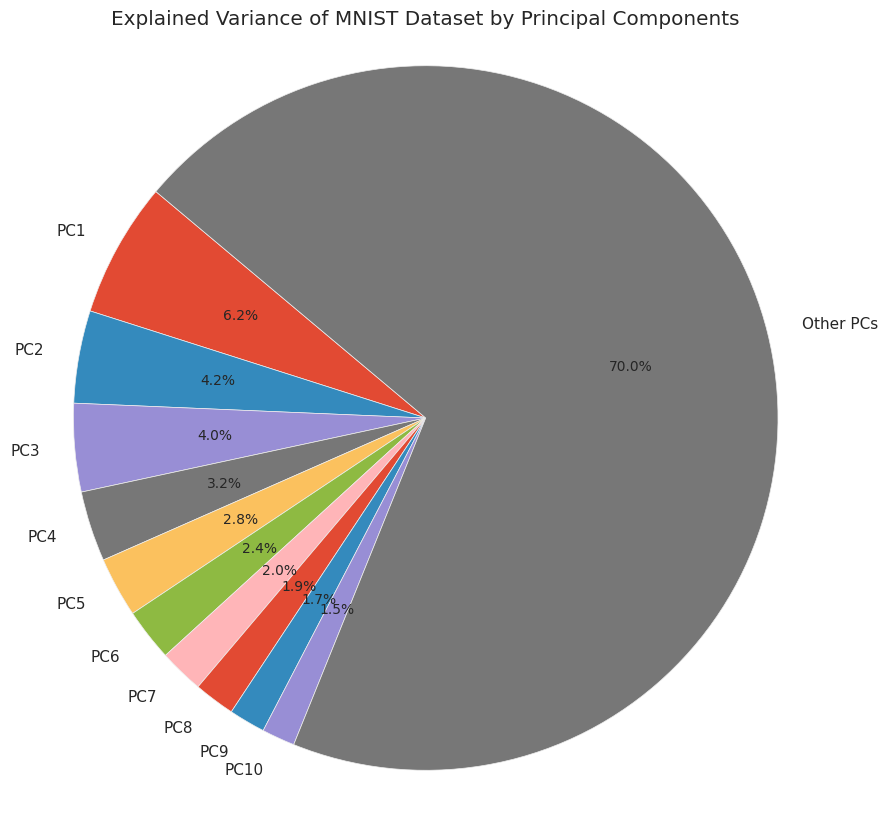

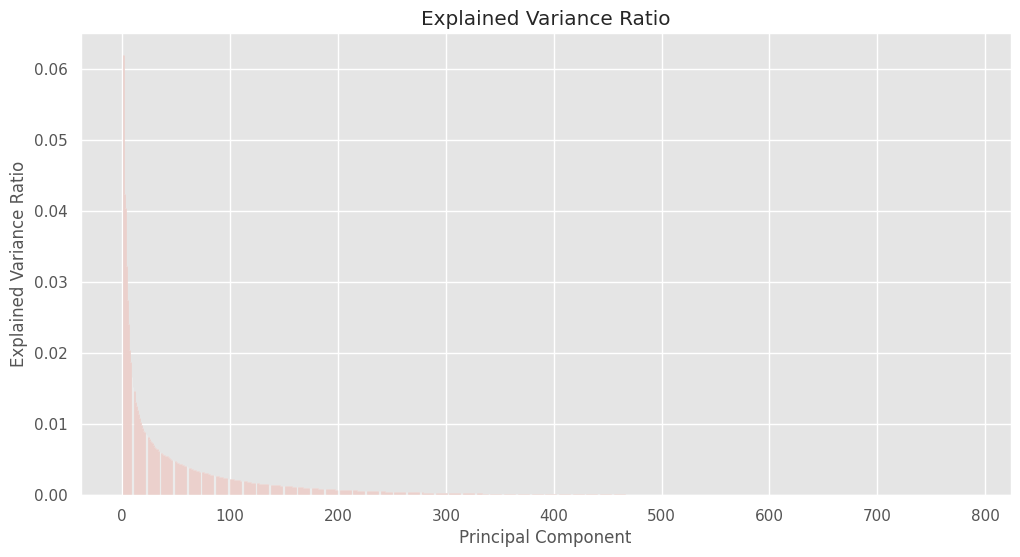

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# فرض می‌کنیم 'sorted_eigenvalues' همان مقادیر ویژه مرتب شده از مرحله قبل است.
# مجموع تمام مقادیر ویژه را محاسبه کنید
total_eigenvalues = np.sum(sorted_eigenvalues)

# واریانس توضیح داده شده برای هر مؤلفه را محاسبه کنید
explained_variance_ratio = sorted_eigenvalues / total_eigenvalues

# برای نمایش بهتر، ۱۰ مؤلفه اول را انتخاب می‌کنیم و مابقی را در یک دسته 'Other' قرار می‌دهیم.
# البته می‌توان تمام ۷۸۴ مؤلفه را نیز نمایش داد، اما نمودار شلوغ می‌شود.
num_components_to_show = 10
explained_variance_subset = explained_variance_ratio[:num_components_to_show]
other_variance = 1 - np.sum(explained_variance_subset)
pie_data = np.append(explained_variance_subset, other_variance)

# ایجاد لیبل‌ها
labels = [f'PC{i+1}' for i in range(num_components_to_show)]
labels.append('Other PCs')

# 1. نمایش واریانس توضیح داده شده در یک نمودار پای
plt.figure(figsize=(10, 10))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Explained Variance of MNIST Dataset by Principal Components')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. (اختیاری) می‌توانید یک نمودار میله‌ای نیز برای وضوح بیشتر رسم کنید.
# این نمودار به ما نشان می‌دهد که چگونه واریانس به سرعت با اضافه شدن مؤلفه‌ها کاهش می‌یابد.
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

<div dir=rtl>
با حفظ حداقل ۵۰ درصد واریانس داده‌ها، ماتریس پرتو(projection matrix) را بدست آورید و تبدیل pca را بر روی دیتاست اجرا کنید.
    <br>
    (۵ نمره)
</div>

In [ ]:
import numpy as np

# فرض می‌کنیم 'sorted_eigenvalues' از مراحل قبل در دسترس است
# محاسبه واریانس توضیح داده شده تجمعی
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# پیدا کردن تعداد مؤلفه‌های لازم برای حفظ حداقل 50 درصد واریانس
n_components_50_percent = np.where(cumulative_explained_variance >= 0.5)[0][0] + 1

print(f"تعداد مؤلفه‌های لازم برای حفظ حداقل 50 درصد واریانس: {n_components_50_percent}")
print(f"واریانس حفظ شده با این تعداد مؤلفه: {cumulative_explained_variance[n_components_50_percent - 1]:.2f}")

تعداد مؤلفه‌های لازم برای حفظ حداقل 50 درصد واریانس: 32
واریانس حفظ شده با این تعداد مؤلفه: 0.51+0.00j


<div dir=rtl>
با استفاده از مقادیر متناظر با pcهای اول و دوم هر داده در دیتاست حاصل شده، نموداری رسم کرده و تاثیر این روش را در جداسازی دو کلاس فقیر و ثروتمند تحلیل کنید.
    <br>
    (۴ نمره)
</div>

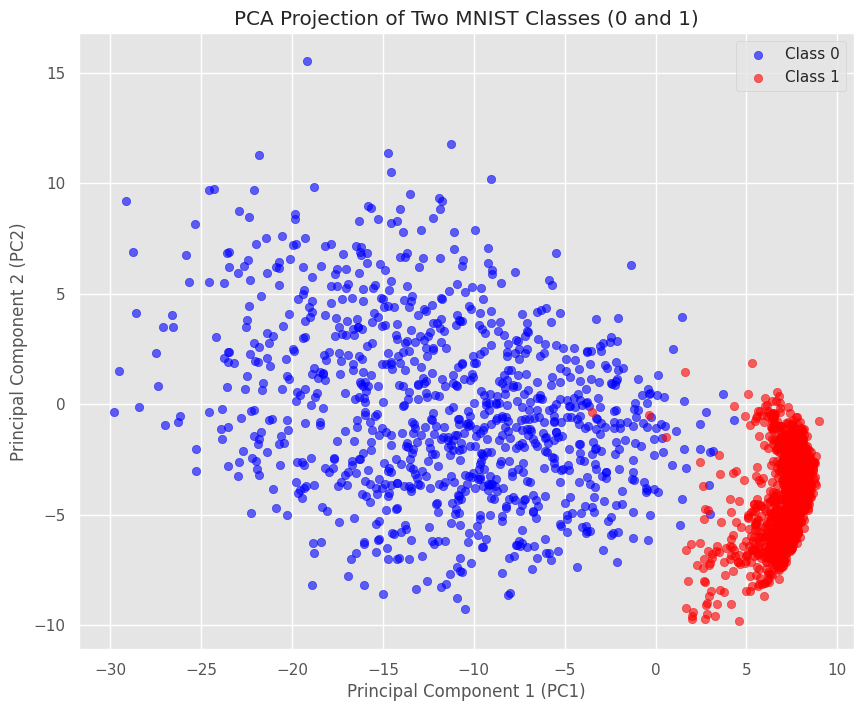

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'arr' and 'label' are already loaded from your notebook's previous cell.
# If you run this cell in a new session, you need to load the data again.
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/Colab Notebooks/mnist.zip'
# with np.load(file_path) as data:
#     arr, label = data['X'], data['y']

# 1. Reshape and normalize the data
X = arr.reshape(arr.shape[0], -1).astype(float)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
std_dev[np.where(std_dev == 0)[0]] = 1
X_normalized = (X - mean) / std_dev

# 2. Perform PCA manually
cov_matrix = np.cov(X_normalized.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
principal_components = sorted_eigenvectors[:, :2] # Select first two PCs
X_pca_transformed = np.dot(X_normalized, principal_components)

# 3. Filter data for two classes (e.g., 0 and 1)
class_one = 0
class_two = 1
filtered_indices = np.where((label == class_one) | (label == class_two))
filtered_pca_data = X_pca_transformed[filtered_indices]
filtered_labels = label[filtered_indices]

# 4. Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered_pca_data[filtered_labels == class_one, 0],
    filtered_pca_data[filtered_labels == class_one, 1],
    c='blue',
    label=f'Class {class_one}',
    alpha=0.6
)
plt.scatter(
    filtered_pca_data[filtered_labels == class_two, 0],
    filtered_pca_data[filtered_labels == class_two, 1],
    c='red',
    label=f'Class {class_two}',
    alpha=0.6
)
plt.title('PCA Projection of Two MNIST Classes (0 and 1)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()